   #               <font color=green>  MIE1624H:    Assignment 1 - Text Analytics and Sentiment Analysis
                                                      By
                                           Sundeep Pothula - 1004588225
                                                  

## Introduction:
Problem Definition: Using sentiment analysis on Twitter data to get insight into the 2015 Canadian elections. 
Different models are used for the binary classification of tweets to predict them either to be positive or negative and analysis on accuracy of using these classifiers is presented in this notebook. Additionally stop words and using count_vectorizer vs idifvectorizer affect on accuracy of model is presented. Finally predicted positivities for each political party using sentimental analysis is discussed.


In [1]:
# Importing the required libraries - ALl other Remaining libraries are imported when and where required in notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
try:
    import nltk
except:
    !pip install nltk

## 1. Data Preparation:
### Reading the data
classified_tweets and unclassified_tweets datasets are imported into pandasdataframe. Pandas dataframe makes it easier and faster to query each and every tweet for data cleaning and all other steps.  

In [2]:
# changing the current working directory and importing data to pandas dataframes
os.chdir(r"\\SRVA\Homes$\pothulas\Desktop\Sentimental Analysis")
classified = pd.read_csv("classified_tweets.txt")
unclassified=pd.read_csv("unclassified_tweets.txt", header= None, names=['tweets'])

### Primary Analysis of data sets:
#### Classified_tweets

In [3]:
classified.head()                  # Analyzing the raw data and identifying various columns present

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
classified.shape                  # To get info about number of tweets and number features given

(200000, 6)

#### Unclassified_tweets

In [5]:
unclassified.head()               # Analyzing the raw data for unclassified dataset 

,tweets
0,living the dream. #cameraman #camera #camerace...
1,justin #trudeau's reasons for thanksgiving. to...
2,@themadape butt…..butt…..we’re allergic to l...
3,2 massive explosions at peace march in #turkey...
4,#mulcair suggests there’s bad blood between hi...


In [6]:
unclassified.shape                # To get info about number of tweets and number features given

(3026, 1)

Dropping Unnecessary columns in Dataframe: Since the id, date, query and user columns are not necessary for the sentimental analysis they are deleted from the dataframe

In [7]:
columns =['id','date','query','user']
classified = classified.drop(columns,1)         # Dropping Unnecessary columns from Classified dataset
classified.head()

,class,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Data cleaning steps:
Data cleaning is an important step in any Data science project since the success of projects heavily depends on the quality of prepared data. In our case- presenece of Urls, stopwords and special characters might significantly affect the model evaluation and fitting. Therefore, all these characters are removed from the tweets using regular expressions and string replace functions.

In [8]:
import re
import string
def cleaning(tweet):
  cleanr = re.compile('<.*?>')      # logic: Removing HTML tags by using regular expressions
  clean1 = re.sub(cleanr, '', tweet)
  clean2 = re.sub(r'[a-z]*[:.]+\S+', "", clean1)  #Removing Url('.' with continous string on eitherside if present is removed )
  clean3 = str(clean2).replace('\xa0',' ')
  clean4 = str(clean3).lower()              # converting all tweets to lower case to create uniformity for model fitting of words
  translation = str.maketrans('', '', string.punctuation)
  clean5 = clean4.translate(translation)        # Removing all special characters
  clean6 = clean5.replace('…', ' ')
  return clean6

#### Unclassified Tweet before cleaning:

In [9]:
unclassified.tweets[1]

"justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr\xa0 #elxn42 poll #quebec #montreal"

#### Classified Tweet before cleaning:

In [10]:
classified.text[100]

' Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji'

In [11]:
classified['text'] = classified.text.apply(lambda x: cleaning(x)) # using lambda func. to call cleaning func. for every tweet
unclassified['tweets'] = unclassified.tweets.apply(lambda x: cleaning(str(x)))

#### Unclassified Tweet after cleaning:

In [12]:
unclassified['tweets'][1]

'justin trudeaus reasons for thanksgiving todays montrealthemoment blog at   elxn42 poll quebec montreal'

#### Classified Tweet after cleaning:

In [13]:
classified.text[100]

' body of missing northern calif girl found police have found the remains of a missing northern california girl  '

In [67]:
classified_withstopwords = classified

### Word Tokenization - Using NLTK
Stop words can be removed either by searching for them in each string or searching for stopwords by tokenizing the tweets. By doing word tokenization we can remove all the stopwords in faster way when compared to removing stopwords from strings. Hence word tokenization of classified and unclassified tweets is done first before removing stopwords.

In [14]:
from nltk.tokenize import word_tokenize
classified['text'] = classified.text.apply(lambda x: word_tokenize(x))
unclassified['tweets'] = unclassified.tweets.apply(lambda x: word_tokenize(x))

In [15]:
classified.head()

,class,text
0,0,"[switchfoot, awww, thats, a, bummer, you, shou..."
1,0,"[is, upset, that, he, cant, update, his, faceb..."
2,0,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,"[my, whole, body, feels, itchy, and, like, its..."
4,0,"[nationwideclass, no, its, not, behaving, at, ..."


In [16]:
unclassified.head()

,tweets
0,"[living, the, dream, cameraman, camera, camera..."
1,"[justin, trudeaus, reasons, for, thanksgiving,..."
2,"[themadape, butt, allergic, to, latex, makes, ..."
3,"[2, massive, explosions, at, peace, march, in,..."
4,"[mulcair, suggests, there, ’, s, bad, blood, b..."


#### Removing Stopwords from the Tweets:
python NLTK library has inbuilt stopwords list. But when counted, it is having only 179 stopwords in it. Therfore, stopwords list provided in the assignment data is used since it is having more number of stopwords (665) which may improve prediction accuracy of model by removing more unnecesaary words. [But this claim about effect of stopwords for model prediction accuracy is further verified in the Modellling section]

In [17]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [18]:
stop=pd.read_csv("stop_words.txt", header=None)
print(len(stop))
stop = set(stop[0])     # Lambda Function used to query each tweet and only select words that are not in stopwords list
unclassified.tweets = unclassified['tweets'].apply(lambda x: [word for word in x if word not in stop])
classified.text = classified['text'].apply(lambda x: [word for word in x if word not in stop])

665


#### Checking the after removing Stopwords:

In [19]:
classified.text[2]

['kenichan',
 'dived',
 'times',
 'ball',
 'managed',
 'save',
 '50',
 'rest',
 'bounds']

In [20]:
unclassified.tweets[2]

['themadape', 'butt', 'allergic', 'latex', 'sneeze', 'nbpoli', 'cdnpoli']

## 2. Exploratory analysis:
In the First step of Exploration- tweets in unclassified set is to be classified based on the party they belong. Two methods are used for this classification purpose and pros & cons of each approach is described after classification.  

#### Overall Logic Followed for Tweet Classification:
 - Number of tags corresponding to each party in every tweet is calculated and stored in Pandas dataframe with party name
 - Each tweet is assigned to the corresponding Party with maximum number of tags
 - If a tweet is not having any of the 5 parties political tags then it is assigned to 'None' 
 - *It is identified that in many tweets number of tags between two or more parties are equal. Since if we consider them in any      one of the party, it may wrongly bias our results: Hence, they are assigned to party 'None'. This might reduce number of        tweets in each party slightly but it will give us accuarte political insights since we are classifying witout bias*

### Method 1:
Classification based on using all tags of political parties by using tokenized tweets in the unclassified set. 

In [21]:
liberal =[]; conservative=[]; new_democratic=[]; bloc=[]; green=[];      # creating list of tags for each political party
liberal_tags=['justin','trudeau','trudeaus','justintrudeau','liberal','liberalparty','lpc', 'realchange' ,'justnotready','ptlib']
conservative_tags=['conservative','conservativeparty','stephenharper','stephen','harper','tory','cpc','tories','pttory']
democratic_tags=['democratic','newdemocratic','ndp','tommulcair','muclair','mulcair','tom','thomas','ptndp','democrat','democrats','npd']
bloc_tags=['bloc','gillesduceppe','gullies','duceppe','ptbloc','quebecois','québécois','bq','gilles']
green_tags=['green','gp','elizabethmay','may','elizabeth','gpc','ptgreen', 'emayin']

In [22]:
def classification(tags, party):  
    for tweet in unclassified.tweets:
        i=0
        for word in tweet:
            if word in tags:
                i=i+1           # function where Frequency of tags in each tweet is identified and stored in pandas dataframe
            else:
                i=i
        party.extend([i])
    return party

In [23]:
unclassified['liberal']= classification(liberal_tags, liberal)
unclassified['conservative'] =  classification(conservative_tags, conservative)
unclassified['new_democratic'] =  classification(democratic_tags, new_democratic)
unclassified['bloc'] = classification(bloc_tags, bloc)
unclassified['green'] = classification(green_tags, green)

In [24]:
unclassified['max_value'] = unclassified.max(axis=1)     # Dividing tweet with maximum party tags to corresponding party
i=0                      
while i<3026:
    if unclassified.max_value[i] == 0:   # If a tweet is having no tags of any party then it is assigned to 'Party - None' 
        unclassified.loc[i,'party'] = 'None'
    elif unclassified.max_value[i] == (unclassified.liberal[i] & unclassified.conservative[i]) or (unclassified.max_value[i] == unclassified.liberal[i] & unclassified.new_democratic[i]) or (unclassified.max_value[i] == unclassified.conservative[i] & unclassified.new_democratic[i]) :
        unclassified.loc[i,'party'] = 'None' ## If same no of tags in multiple parties then it is assigned to none
    elif unclassified.max_value[i] == unclassified.conservative[i]:
        unclassified.loc[i,'party'] = 'cpc'
    elif unclassified.max_value[i] == unclassified.liberal[i]:
        unclassified.loc[i,'party'] = 'lpc'
    elif unclassified.max_value[i] == unclassified.new_democratic[i]:
        unclassified.loc[i,'party']=  'ndp'
    elif unclassified.max_value[i] == unclassified.bloc[i]:
        unclassified.loc[i,'party'] = 'bloc'
    elif unclassified.max_value[i] == unclassified.green[i]:
        unclassified.loc[i,'party'] = 'gpc'  
    i=i+1                  # Tweet is classified into particular party if it having more number of tags belonging to it!!

In [25]:
unclassified.head()

,tweets,liberal,conservative,new_democratic,bloc,green,max_value,party
0,"[living, dream, cameraman, camera, cameracepti...",0,0,1,0,0,1,ndp
1,"[justin, trudeaus, reasons, thanksgiving, toda...",2,0,0,0,0,2,lpc
2,"[themadape, butt, allergic, latex, sneeze, nbp...",0,0,0,0,0,0,None
3,"[2, massive, explosions, peace, march, turkey,...",0,0,0,0,0,0,None
4,"[mulcair, suggests, ’, bad, blood, trudeau, re...",1,0,2,0,0,2,ndp


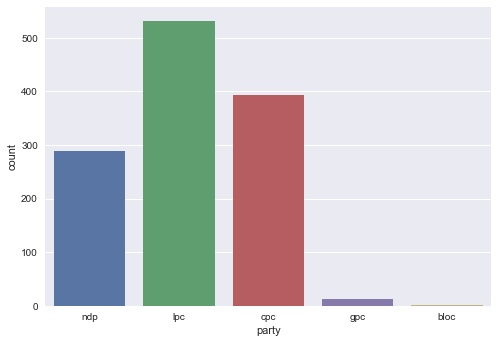

In [26]:
import seaborn as sns
party_data = unclassified.drop(unclassified[unclassified.party =='None'].index)
sns.countplot(x ='party', data = party_data)
plt.show()

In [27]:
unclassified['party'].value_counts()        c

None    1799
lpc      531
cpc      393
ndp      288
gpc       13
bloc       2
Name: party, dtype: int64

#### Method 1: Pros  & Cons:
Although we are able to classify good number of tweets into each party, When closely checked into unclassified set - it is identified that there can be large number of tags that can be unidentified by us like - #teamtrudeau, #supportliberal etc..
Since listing out all possible tags individually for each of the party is a difficult task, I am using method 2 which searches for most general tags belonging to each party in the tweets (tweets are converted back from tokens to strings for this purpose)

In [28]:
from nltk.tokenize.moses import MosesDetokenizer          # Detokenizing the tweets back to string using Mosesdetokenizer
detokenizer = MosesDetokenizer()
unclassified.tweets = unclassified.tweets.apply(lambda x: detokenizer.detokenize(x, return_str=True))

### Tags used for method 2:   Alternate Logic to avoid missing of tweets       <font color=blue>   |||Bonus|||
Since we are searching for tags in string instead of individual tokens- We require only few tags here because identifying justin or trudeau is similar to identifying teamtrudeau or teamjustin etc... This helps us from losing tweets that can be unidentified by using the previous approach. (If we miss any tags)

In [29]:
unclassified = unclassified.drop(unclassified.columns[[1, 2, 3, 4, 5, 6, 7]], axis=1) 

In [30]:
liberal2 =[]; conservative2=[]; new_democratic2=[]; bloc2=[]; green2=[]; 
liberal_tags=['justin','trudeau','liberal','lpc', 'realchange' ,'justnotready','ptlib']
conservative_tags=['conservative','stephen','harper','tories','cpc']
democratic_tags=['ndp','muclair','mulcair','tom','thomas','ptndp','democrat','npd']
bloc_tags=['bloc','gullies','duceppe','ptbloc','quebecois','québécois','bq','gilles']
green_tags=['green','gp','may','elizabeth', 'emayin']

In [31]:
def tweet_classification(tags, party):
    for tweet in unclassified.tweets:
        k=0                      # function where Frequency of tags in each tweet is identified and stored in pandas dataframe
        for j in range(len(tags)):
            k = k+tweet.count(tags[j])
        party.extend([k])
    return party                

In [32]:
unclassified['liberal']= tweet_classification(liberal_tags, liberal2)
unclassified['conservative'] =  tweet_classification(conservative_tags, conservative2)
unclassified['new_democratic'] =  tweet_classification(democratic_tags, new_democratic2)
unclassified['bloc'] = tweet_classification(bloc_tags, bloc2)
unclassified['green'] = tweet_classification(green_tags, green2)

In [33]:
unclassified['max_value'] = unclassified.max(axis=1)     
i=0                      
while i<3026:
    if unclassified.max_value[i] == 0:   # If a tweet is having no tags of any party then it is assigned to 'Party - None' 
        unclassified.loc[i,'party'] = 'None'
    elif unclassified.max_value[i] == (unclassified.liberal[i] & unclassified.conservative[i]) or (unclassified.max_value[i] == unclassified.liberal[i] & unclassified.new_democratic[i]) or (unclassified.max_value[i] == unclassified.conservative[i] & unclassified.new_democratic[i]) :
        unclassified.loc[i,'party'] = 'None'
    elif unclassified.max_value[i] == unclassified.liberal[i]:
        unclassified.loc[i,'party'] = 'lpc'
    elif unclassified.max_value[i] == unclassified.conservative[i]:
        unclassified.loc[i,'party'] = 'cpc'
    elif unclassified.max_value[i] == unclassified.new_democratic[i]:
        unclassified.loc[i,'party']=  'ndp'
    elif unclassified.max_value[i] == unclassified.bloc[i]:
        unclassified.loc[i,'party'] = 'bloc'
    elif unclassified.max_value[i] == unclassified.green[i]:
        unclassified.loc[i,'party'] = 'gpc'  
    i=i+1                  # Tweet is classified into particular party if it having more number of tags belonging to it!!

In [34]:
unclassified.head()                           # Method 2 : result after Searching for tags in strings

,tweets,liberal,conservative,new_democratic,bloc,green,max_value,party
0,living dream cameraman camera cameraception ca...,0,0,2,0,0,2,ndp
1,justin trudeaus reasons thanksgiving todays mo...,2,0,0,0,0,2,lpc
2,themadape butt allergic latex sneeze nbpoli cd...,0,0,0,0,0,0,None
3,2 massive explosions peace march turkey 30 kil...,0,0,0,0,0,0,None
4,mulcair suggests ’ bad blood trudeau ready4cha...,1,0,2,0,0,2,ndp


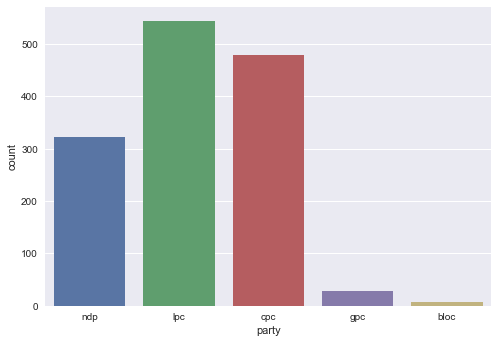

In [35]:
party_data = unclassified.drop(unclassified[unclassified.party =='None'].index)
sns.countplot(x ='party', data = party_data); plt.show();

In [36]:
unclassified['party'].value_counts()                              # Count of Tweets in each Party

None    1644
lpc      544
cpc      480
ndp      323
gpc       28
bloc       7
Name: party, dtype: int64

#### Method 2: Pros  & Cons:
When checked for program executon time method 2 is taking slightly more time when compared to method 1. But we have significant increase in number of tweets identified by method 2 - Therefore, I finalized this method for tweet classification and this data is used in final analysis to draw political insights of different political parties. 

<font color=blue>   |||Bonus|||

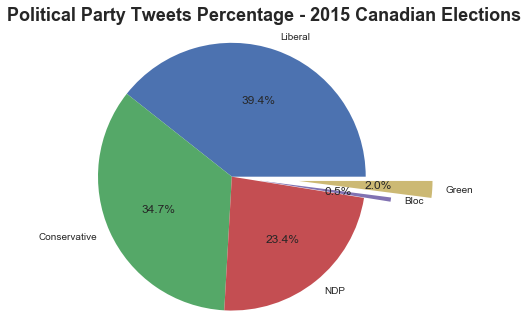

In [37]:
lpc=unclassified[unclassified.party == 'lpc']; ndp=unclassified[unclassified.party == 'ndp']; cpc=unclassified[unclassified.party == 'cpc'];bloc=unclassified[unclassified.party == 'bloc'];green=unclassified[unclassified.party == 'gpc']
party_titles = ['Liberal', 'Conservative', 'NDP', 'Bloc', 'Green']
y = [len(lpc.index),len(cpc.index),len(ndp.index),len(bloc.index),len(green.index)]
piechart = plt.pie(y,  labels = party_titles, autopct = '%1.1f%%', explode = (0, 0, 0, 0.2, 0.5))
plt.title('Political Party Tweets Percentage - 2015 Canadian Elections', fontsize = 18, fontweight = 'bold')
plt.axis('equal')
plt.show()

Above pie chart clearly mentions that among all parties there is more liberal buzz followed by Conservative and NDP parties in twitter. Bloc and green parties together have a share of 2.5 percentage which is significant enough difference to say that they are not in lead competition. Liberals and Conservatives buzz is very close in the twitter with both of them contributing to 75% of total tweets. 

From the Exploratry analysis of twitter data it is clear that Major political fight is between liberals and Conservatives. Doing sentimental analysis for these tweets can further reveal about the peoples stand in Twitter for these parties.

### Graphical Represenation of Classified sets: (Number of positive neagative tweets)

Below plot clearly shows that there are equal number (100,000 each) of Positive and Negative Tweets in the Classified datasets. This might help in building model in a better way since we have equal categories of data.

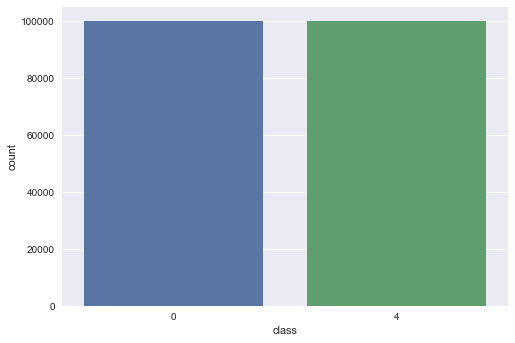

In [38]:
sns.countplot(x='class', data=classified); plt.show();

## 3. Model preparation:
Predictive modeling (Classification type) is used to categorize the tweets into either positive or negative. 
 - ALthough we have many classification models like Naive Bayesian, Logistic Regression , decision trees, KNN classification, SVM, Artificial Neural networks etc., 
 - 3 Models (Logistic Regression, Naive Bayesian and Random Forest) are used for classification of tweets and their accuracies and runtime are compared. It is also found that SVM and KNN are taking very large runtimes when tried and hence they are not included in this notebook.

#### Training and Testing Splits:
If the whole classified data is used for training the model it might cause overfitting of the given data and hence model accuracy  predicted from that will not be true. Therefore, classified_tweets are initially divided into training and testing sets so that testing set which is not used for training the model is used for finding the right accuracy of model.
train_test_split from sklearn.model_selection is used for randomly splitting data to 30% testing and 70% training sets.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(classified['text'], classified['class'], test_size =0.3)

In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

#### Data Preparation for Implementing Model:
Since we have all the textual data (tweets), We need to convert them to some kind of numeric representation for machine learning. In our case each word or count of each word in the tweets is selected as independent variables or features of the model. This approach is called as Bag of Words. countVectorizer in feature_extraction module from scikit-learn is used to create bag-of-words features.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

To convert the Dataframe into list with string items in it we use, astype(str).values.tolist();
This casts the column dtype using astype(str) and then convert to list using .values.tolist(), this returns a numpy array using .values which has a member function to convert this to a list.

In [42]:
X_train = X_train['text'].astype(str).values.tolist()
X_test = X_test['text'].astype(str).values.tolist()

Count_Vectorizer function is used to convert X_train and X_test textual data to numerical format by counting the frequency of words in each tweet. First X_train is fitted by Count_vectorizer to create a sparse matrix containing all the words in the training data. Then this fitted sparse matrix is further used to transform the X_test to numerical count data

In [43]:
z = count_vect.fit_transform(X_train)

In [44]:
w = count_vect.transform(X_test)

## 4. Model implementation:
### 4.1 Logistic Regression:
Logistic regression predicts the probability of an tweet to be either in positive(4) or negative(0) class. LogisticRegression function from sklearn.linear_model is used for this purpose. After training the model with logistic regression, Models accuracy evaulation is performod using various methods.

In [45]:
from sklearn.linear_model import LogisticRegression      # Importing Logistic Regression Function
from sklearn import metrics

In [46]:
start = time.time()              # Time function used to evaluate the execution run time for training logistic model

logreg =  LogisticRegression()
logreg.fit(z, y_train.values.ravel())
logreg.score(z,y_train.values.ravel())
y_pred_class = logreg.predict(w)

end = time.time()
logreg_time = (end - start)/60    # Time converted to Minutes
logreg_time

0.09282586574554444

In [47]:
logreg_accuracy = logreg.score(w, y_test)*100    # Accuracy of the Logistic Regression Model on the test set
logreg_accuracy

73.879999999999995

## Model evaluation:
### K fold Crossvalidation:      <font color=blue>   |||Bonus|||
If we are using Training and testing sets individually then all of the data cannot be used for training the model. (since we divide training and testing sets randomly so we might be constraing to train the model based on the train set that we randomly selected). Using K fold cross validation can solve this problem. The data set is divided into k subsets, and it is trained k times where in each case one among K sets is used for testing the model to predict accuracy. Final accuracy is calculated by taking the mean of accuracies obtained in all these K steps. To check our Model perfomance accuratley I used K fold cross validation as mentioned below. 

In [58]:
from sklearn.cross_validation import cross_val_score      # Importing Cross Validation from sklearn
X =classified['text'].astype(str).values.tolist()
X = count_vect.transform(X)
y = classified['class']
Log_reg_cross_val = (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
Log_reg_cross_val*100                                      # Finding the mean accuracy of 10 cases

73.258499999999998

### Cheking Model Perfomance by using TfidfVectorizer for featrues:        <font color=blue>   |||Bonus|||
Countvectorizer gives equal weightage to all the words in all the tweets, i.e. a word is converted to a column (in a dataframe for example) and for each tweet, it is equal to 1 if it is present in that tweet else 0. 
Tfidf is different from countvectorizer. Apart from giving counts information, tfidf says how important that word is to that tweet with respect to the corpus. It uses weighting technique which helps ML model during classification as it explicitly tells which word weighs more/less.
So the perfomance of Logistic Regression Model is checked using TfidfVectorizer.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer
Tfid_vect = TfidfVectorizer(min_df=1)

X =classified['text'].astype(str).values.tolist()            # Fitting or transforming text data to Tfidf Vectorizer
X = Tfid_vect.fit_transform(X)
y = classified['class']

Log_reg_Tfid_cross_val = (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(Log_reg_Tfid_cross_val*100)                         
                                                            # Using Cross Validation and finding mean accuracy

74.05


From above it is clear that using TfidfVectorizer and Count_Vectorizer there is no significant difference in the accuracy obtained by doing cross validation. Hence Count_Vectorizer is used for prediction of unclassified tweets since it is computaionally much faster.

In [60]:
## Printing first 25 original and predicted classes for the tweets
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 0 4 0 0 4 0 0 0 4 0 4 0 0 4 4 0 4 4 0 4 0 0 4]
False: [0 4 0 4 4 4 4 0 4 0 4 0 4 4 0 4 4 4 4 4 0 4 0 0 4]


### Confusion Matrix Analysis:      <font color=blue>   |||Bonus|||
Confusion matrix gives you a more complete picture of how your classifier is performing. Since from the below calculations it is clear that sensitivity and specificity are greater that 70% it clearly implies that our classifier is correctly predicting in more than 70% of the both actual positive and Negative cases.

In [61]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[21404  8716]
 [ 6956 22924]]


In [62]:
sensitivity = TP / float(FN + TP)
print(sensitivity*100)

76.7202141901


In [63]:
specificity = TN / (TN + FP)
print(specificity*100)

71.0624169987


### Plotting ROC Curve for the Logreg Model:      <font color=blue>   |||Bonus|||

In [64]:
y_pred_prob = logreg.predict_proba(w)[:, 1]
a=np.array(y_test); a[a == 4] = 1;

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(a, np.array(y_pred_prob))

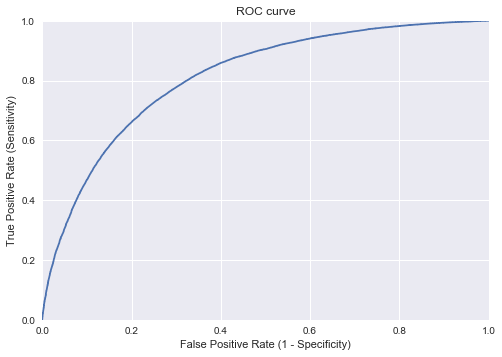

In [66]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

ROC curve can help us to choose a threshold that balances sensitivity and specificity in a way that makes sense for our Analysis. Since we are analysizing positive and negative tweets Threshold value of .5 is good for our case.


### Evaluating Logreg Model Without Stopwords:      <font color=blue>   |||Bonus|||

In [70]:
X_nostop = classified_withstopwords['text'].astype(str).values.tolist()
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_vect = TfidfVectorizer(min_df=1)

X = Tfid_vect.fit_transform(X_nostop)              # X_nostop is Tweet data before removing stop words
y = classified['class']

Log_reg_Tfid_cross_val = (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(Log_reg_Tfid_cross_val*100)                  # Using Cross Validation and finding mean accuracy


74.05


We can see that there is slight improvement in accuracy if we perform Logistic Regression with the stopwords. This might say that removing large number of stopwords might have an impact on evaluvating positivity and negativity of tweets. Or we can say the list we used to remove stopwords might have excess words that impacts word sensitivity and hence the shorter version of it might be used.

### Evaluating the unclassified data with the Logreg model :

In [71]:
v = count_vect.transform(unclassified['tweets'])

In [72]:
unclassified['class'] = logreg.predict(v)

In [73]:
unclassified.head(10)

,tweets,liberal,conservative,new_democratic,bloc,green,max_value,party,class
0,living dream cameraman camera cameraception ca...,0,0,2,0,0,2,ndp,0
1,justin trudeaus reasons thanksgiving todays mo...,2,0,0,0,0,2,lpc,4
2,themadape butt allergic latex sneeze nbpoli cd...,0,0,0,0,0,0,None,0
3,2 massive explosions peace march turkey 30 kil...,0,0,0,0,0,0,None,0
4,mulcair suggests ’ bad blood trudeau ready4cha...,1,0,2,0,0,2,ndp,0
5,polqc se sort de la marde avec harper prêt à r...,1,1,0,0,0,1,None,4
6,harper 8m help countries wing govts elected cd...,0,1,0,0,0,1,cpc,4
7,tommy taylor,0,0,1,0,0,1,ndp,4
8,justintrudeau thomasmulcair,2,0,2,0,0,2,None,4
9,tracy retweeted tsec,0,0,0,0,0,0,None,4


In [74]:
unclassified['class'].value_counts()     # To check the number of positive and negative tweets Predicted in unclassified dataset

4    2200
0     826
Name: class, dtype: int64

### Using Random Forest Classifier:    <font color=blue>   |||Bonus|||
Random Forest uses many tree-based classifiers to make predictions, hence the "forest". Below, we set the number of trees to 100 as a reasonable default value. More trees may (or may not) perform better, but will certainly take longer to run.

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
start_forest = time.time()

forest = RandomForestClassifier(n_estimators = 20) 
forest.fit(z, y_train)
y_pred_forest = forest.predict(w)

end_forest = time.time()
forest_time = (end_forest-start_forest)/60
forest_time

16.07763954401016

In [78]:
forest.score(z,y_train)           ## Training Accuracy for Random Forest Classifier

0.98857142857142855

In [81]:
forest_accuracy = forest.score(w, y_test)*100           ## Testing Accuracy for Random Forest Classifier
forest_accuracy 

70.101666666666659

### Using Naive Bayesian Classifier:  <font color=blue>   |||Bonus|||
Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. It calculates probability either to be in class 0 or class 4 based on the Bayesian rule.
Since in our case features descibe about the descrete frequency counts of each word I am using Multinomial Naive Bayes model here for the tweet classification.

In [82]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [83]:
start_NB = time.time()

nb_classifier.fit(z, y_train.values.ravel())
nb_classifier.score(z,y_train.values.ravel())
nb_classifier_pred = nb_classifier.predict(w)

end_NB =time.time()
NB_time = (end_NB-start_NB)/60
NB_time

0.0013352473576863607

In [84]:
from sklearn.metrics import accuracy_score 
NB_accuracy = (accuracy_score(nb_classifier_pred ,y_test))*100
NB_accuracy

73.409999999999997

### Comparing the three Classifiers:   <font color=blue>   |||Bonus|||

In [85]:
classifiers = { }
classifiers['Classifier'] = ['Logistic Regeression', 'Random Forest', 'Naive Bayesian']
classifiers['Run_time'] = [logreg_time, forest_time,NB_time]
classifiers['Accuracy'] = [logreg_accuracy, forest_accuracy, NB_accuracy]
classifiers = pd.DataFrame(classifiers)
classifiers

,Accuracy,Classifier,Run_time
0,73.880000,Logistic Regeression,0.092826
1,70.101667,Random Forest,16.077640
2,73.410000,Naive Bayesian,0.001335


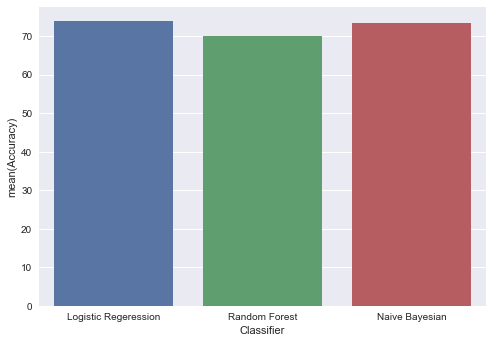

In [86]:
sns.barplot(y ="Accuracy", x="Classifier", data=classifiers); plt.show();

Above data clearly shows that for our dataset Accuracy obtained is almost same in all the three classification Models with Logistic_Regression slightly on the higher side. Although, if we compare Runtime executions for these classifiers they significantly vary. Naive Bayesian is faster among all these and Random Forest model training is taking maximum time of 14.9 mins. Rest two models are trained in seconds.

## 5. Discussion:

In [87]:
party_data = unclassified.drop(unclassified[unclassified.party =='None'].index)
party_data.head()

,tweets,liberal,conservative,new_democratic,bloc,green,max_value,party,class
0,living dream cameraman camera cameraception ca...,0,0,2,0,0,2,ndp,0
1,justin trudeaus reasons thanksgiving todays mo...,2,0,0,0,0,2,lpc,4
4,mulcair suggests ’ bad blood trudeau ready4cha...,1,0,2,0,0,2,ndp,0
6,harper 8m help countries wing govts elected cd...,0,1,0,0,0,1,cpc,4
7,tommy taylor,0,0,1,0,0,1,ndp,4


#### Overall Positivity:
From the below plot it clearly indicates that there are more number of Positive Tweets in the unclassified data which directly says that in general the overall sentiment towards the 2015 Canadian Election is poitive.

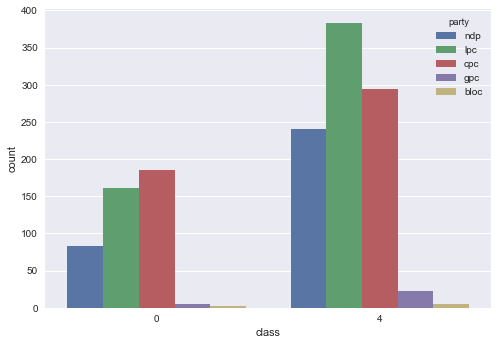

In [88]:
sns.countplot(x="class", hue="party", data = party_data)
plt.show()

If we analyze individual party tweets it shows that there is more percentage of positivity in tweets for Liberal party followed by NDP and then conservatives. An interesting insight that can be identified is that although Conservative party shares around 35% of the total tweets next to Liberal party, Percentage negativity is very high for conservative party when compared to other parties. 

So purely based on the positivity of the tweets we can say that public are more positive towards the Liberals and NDP and hence they have great chance to win the elections.

From exploratory analysis we identified that Liberal is having more buzz among the public considering the tweet percentage. And now by considering the Sentimental Analysis we can say that the liberals are having positive buzz among public with great chance to win the elections and which happened.

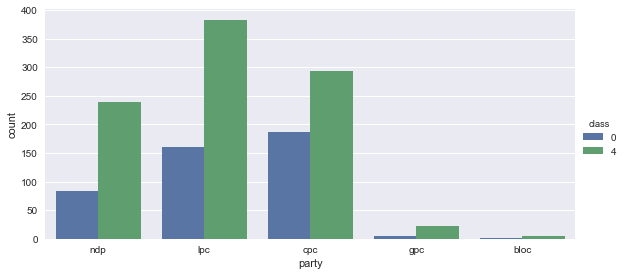

In [89]:
sns.factorplot(x="party", hue="class",data=party_data, kind="count",size=4, aspect=2)
plt.show()

Above graph shows the public positivity and negativity for each party based on sentimental analysis performed on the sample twitter data collected before 2015 Canadian elections. One more interesting insight is that the percentage share of tweets each party got in this sample clearly reflects the final voting percentage.

Final Voting Data:  https://en.wikipedia.org/wiki/Results_of_the_Canadian_federal_election,_2015    

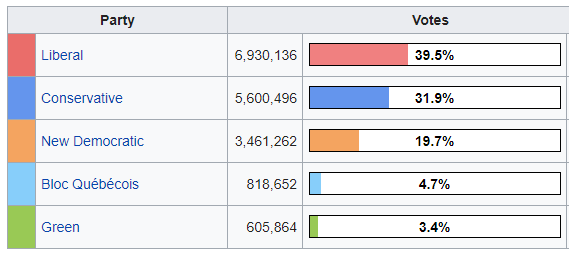

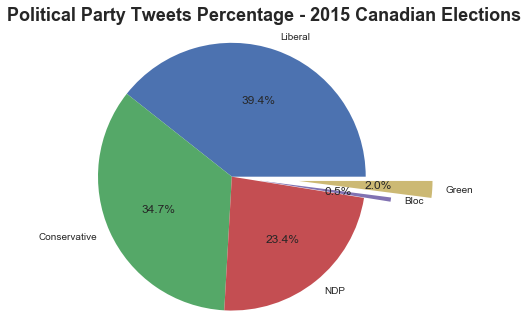

In [93]:
party_titles = ['Liberal', 'Conservative', 'NDP', 'Bloc', 'Green']
y = [len(lpc.index),len(cpc.index),len(ndp.index),len(bloc.index),len(green.index)]
piechart = plt.pie(y,  labels = party_titles, autopct = '%1.1f%%', explode = (0, 0, 0, 0.2, 0.5))
plt.title('Political Party Tweets Percentage - 2015 Canadian Elections', fontsize = 18, fontweight = 'bold')
plt.axis('equal')
plt.show()

We can say that actual percentage of votes obtained and the buzz in the twitter (Based on percentage of tweets) have a great coincidence showing the imporatnace of social media data like twitter. And hence Analyzing this kind of data can speak about the political party sceneraios in election with good confidence levels.

                                                ............................

 <font color=blue>   |||Bonus Works Done:||| 


  1. Classification of Tweets using two methods - And finding the better one (With and Without Tokenizing)
  2. Exploration of Unclassified tweets by Piechart
  3. Model Evaluation:
      - Kfold Cross Validation
      - Comparing TfidfVectorizer & Count_Vectorizer
      - Evaluating Logistic Regression Without Stop Words
      - Confusion Matrix Analysis
      - ROC Curve for Logistic Regression
  4. Using Multiple Classifiers
      - Random Forest
      - Naive Bayesian
      - Comparision of these 3 Classifiers with Accuracy and Execution Times

                                                     .................